# Explore here

In [439]:
import pandas as pd

# Cargar datos
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [440]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [441]:
# Duplicados
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [442]:
# Pasar de variable categorica a variable numerica

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]


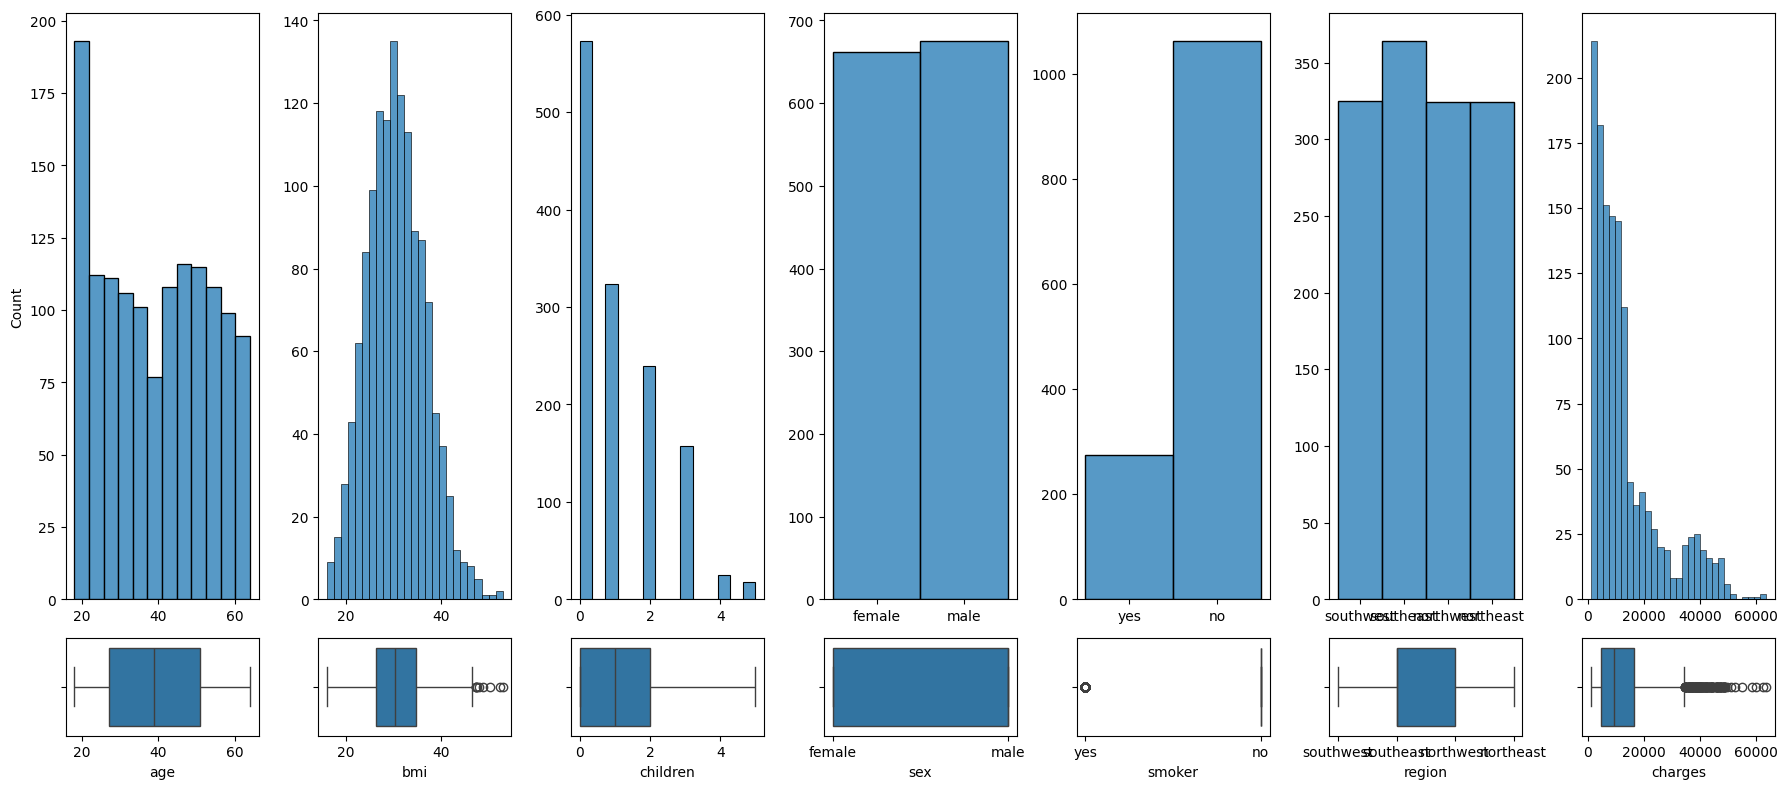

In [443]:
# Analisis sobre variables numericas
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con histogramas y diagramas de caja
fig, axes = plt.subplots(2, 7, figsize=(18, 8), gridspec_kw={'height_ratios': [6, 1]})

# Histogramas y diagramas de caja para cada variable numérica
sns.histplot(data=total_data, x="age", ax=axes[0, 0]).set(xlabel=None)
sns.boxplot(data=total_data, x="age", ax=axes[1, 0])

sns.histplot(data=total_data, x="bmi", ax=axes[0, 1]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="bmi", ax=axes[1, 1])

sns.histplot(data=total_data, x="children", ax=axes[0, 2]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="children", ax=axes[1, 2])

sns.histplot(data=total_data, x="sex", ax=axes[0, 3]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="sex", ax=axes[1, 3])

sns.histplot(data=total_data, x="smoker", ax=axes[0, 4]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="smoker", ax=axes[1, 4])

sns.histplot(data=total_data, x="region", ax=axes[0, 5]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="region", ax=axes[1, 5])

sns.histplot(data=total_data, x="charges", ax=axes[0, 6]).set(xlabel=None, ylabel=None)
sns.boxplot(data=total_data, x="charges", ax=axes[1, 6])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

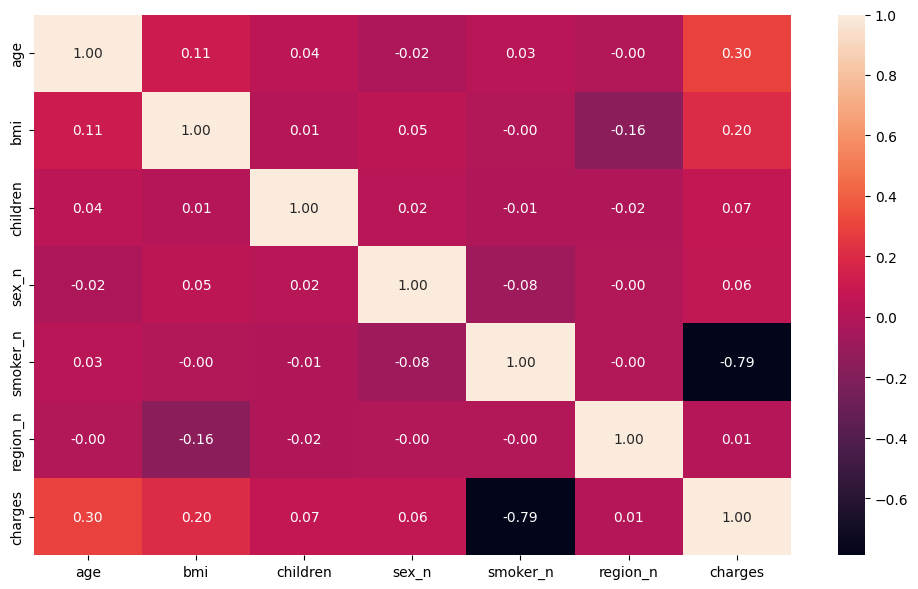

In [444]:
# Analisis de correlacion
import seaborn as sns
import matplotlib.pyplot as plt

# Analisis de correlacion
fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(total_data[["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()

In [445]:
# Analisis de Outliers
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


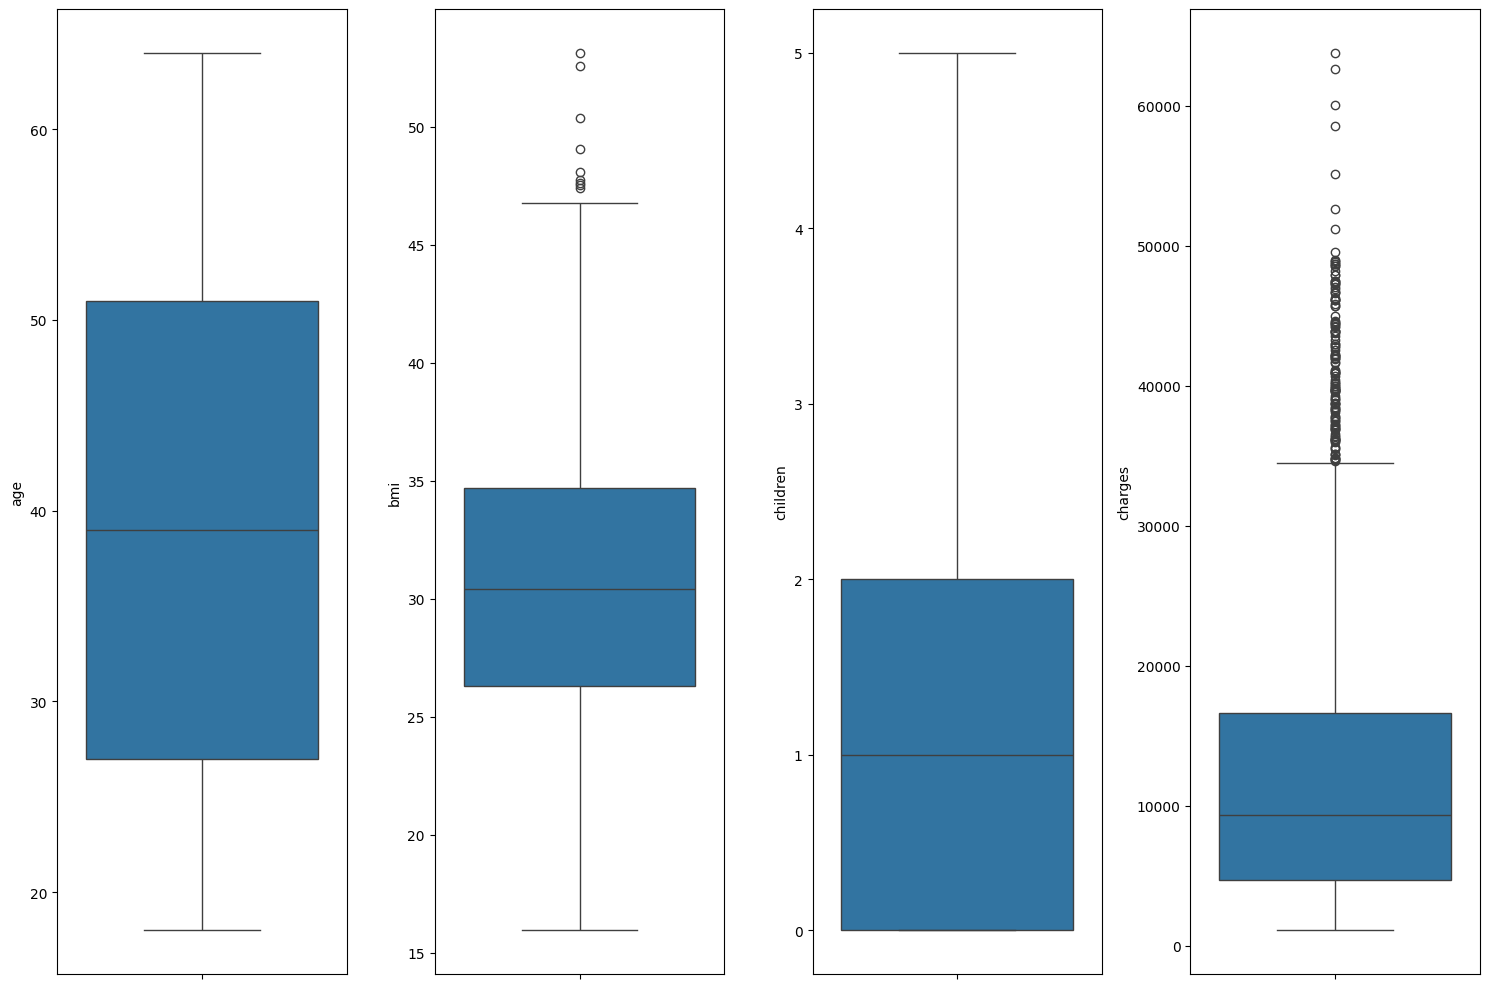

In [446]:
# Diagrama de cajas con columnas normalizadas
fig, axis = plt.subplots(1, 4, figsize=(15, 10))

sns.boxplot(ax=axis[0], data=total_data, y="age")
sns.boxplot(ax=axis[1], data=total_data, y="bmi")
sns.boxplot(ax=axis[2], data=total_data, y="children")
sns.boxplot(ax=axis[3], data=total_data, y="charges")

plt.tight_layout()
plt.show()

In [447]:
bmi_stats = total_data["bmi"].describe()
print(bmi_stats)

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64


In [448]:
# metodo intercuartilico IQR
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 47.32 y 13.67, con un rango intercuartílico de 8.41


In [449]:
# Normalizar el DataFrame
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
total_data_scal = pd.DataFrame(scal_features, index=total_data.index, columns=num_variables)

total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [450]:

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = total_data_scal.drop("charges", axis=1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

selection_model = SelectKBest(f_regression, k=4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns)

X_train_sel.head()

,age,bmi,children,smoker_n
0,0.456522,0.520312,0.4,0.0
1,0.717391,0.253968,0.0,1.0
2,0.369565,0.273473,0.0,1.0
3,0.152174,0.288808,0.8,1.0
4,0.891304,0.316384,0.6,1.0


In [459]:
X_test_sel.head()

,age,bmi,children,smoker_n,charges
0,0.565217,0.372612,0.4,1.0,0.113288
1,0.195652,0.218994,0.0,1.0,0.029566
2,0.000000,0.653753,0.0,1.0,0.008184
3,0.913043,0.342750,0.2,1.0,0.193186
4,0.456522,0.488028,0.6,1.0,0.100507


In [460]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

REGRESION LINEAL

In [461]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.456522,0.520312,0.4,0.0,0.622233
1,0.717391,0.253968,0.0,1.0,0.122279
2,0.369565,0.273473,0.0,1.0,0.065542
3,0.152174,0.288808,0.8,1.0,0.059955
4,0.891304,0.316384,0.6,1.0,0.205580


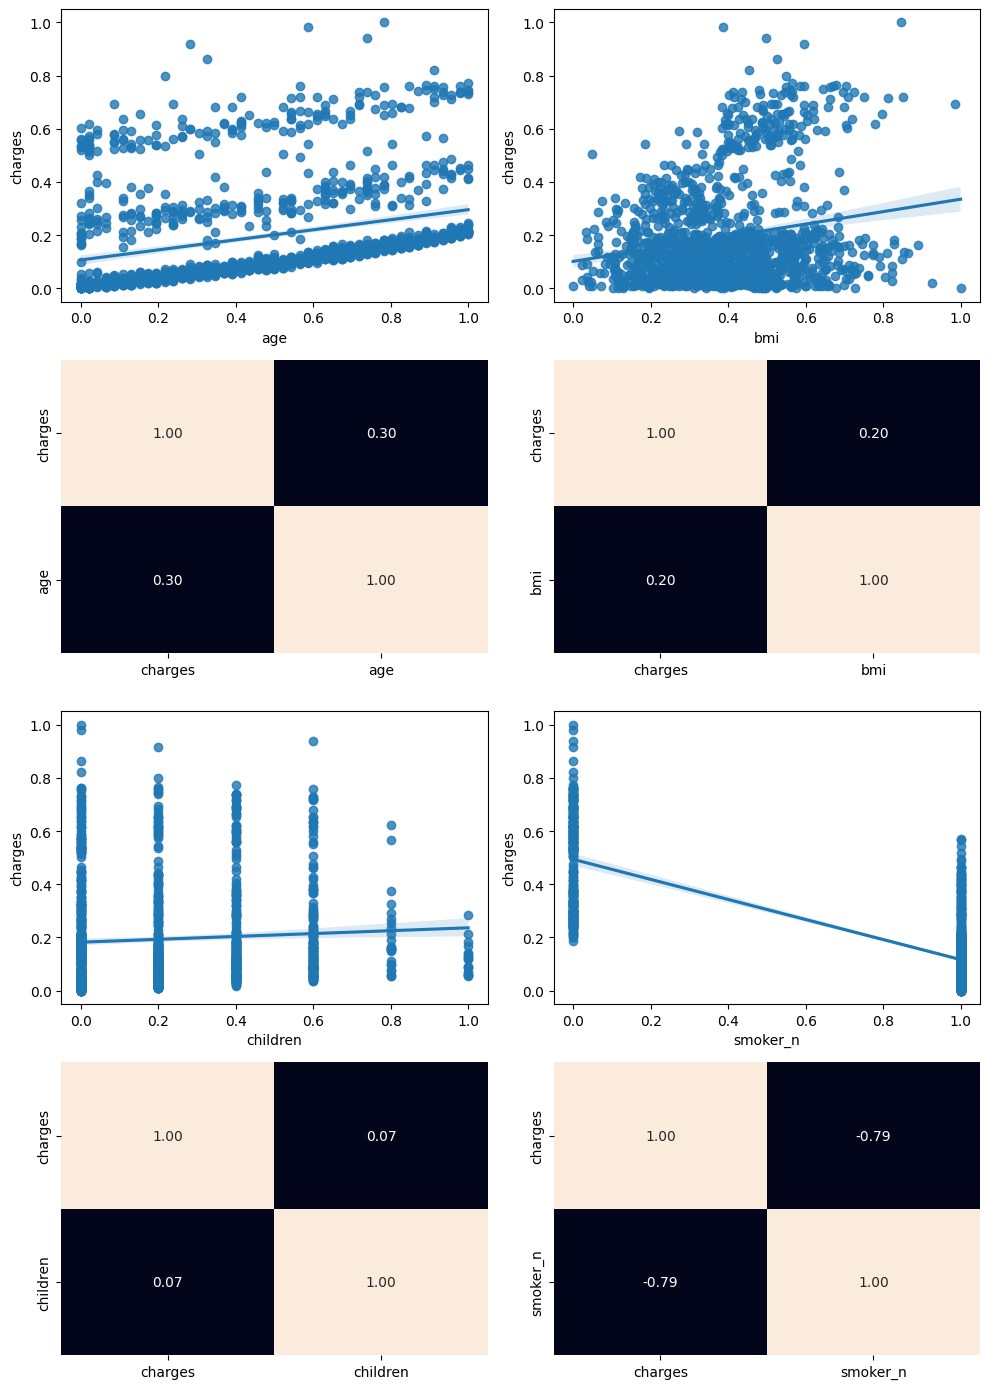

In [462]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [463]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

In [464]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [465]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 0.3273851126371847
Coefficients (b1, b2): [ 0.19128785  0.19146575  0.02896419 -0.38272628]


In [466]:
y_pred = model.predict(X_test)
y_pred

array([ 0.13570623,  0.02401453,  0.06983015,  0.19073059,  0.14280505,
        0.49571622,  0.15912003,  0.13612458,  0.16140798,  0.19946381,
        0.57642514,  0.04177936,  0.0917234 ,  0.52300731,  0.22558407,
        0.61345503,  0.23611705,  0.0231989 ,  0.232112  ,  0.5307618 ,
        0.02808816,  0.08346771,  0.22796112,  0.08509998,  0.55885141,
        0.01267888,  0.17240982,  0.2219268 ,  0.10836679,  0.15720133,
        0.1318987 ,  0.21311846,  0.04698411,  0.03591994,  0.00778535,
        0.24034093,  0.01961037,  0.00888858,  0.23939437, -0.00298041,
        0.05589333,  0.08380041,  0.17434047,  0.17250431, -0.00441517,
        0.19026586,  0.2142517 ,  0.44874576,  0.05816737,  0.15410953,
        0.13025575,  0.26124464,  0.18463836,  0.12401867,  0.22007781,
        0.07246374,  0.52092751,  0.47808986,  0.19387918,  0.38920779,
        0.22279282,  0.19287896,  0.02368825,  0.11742415,  0.01463317,
        0.50125678,  0.09087245,  0.10352379,  0.03118208,  0.06

In [467]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")            # Coeficiente de determinación

MSE: 0.011876849941029412
R2 Score: 0.6834888442812173
